<a href="https://colab.research.google.com/github/Stanley2204/TugasDataMining/blob/main/Exercise_Week_4_Classification_Model_%5BQuestion%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [105]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # Example ML model
from sklearn.metrics import mean_squared_error  # For evaluating models

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/Stanley2204/TugasDataMining/refs/heads/main/penguins_size.csv')
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [108]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [109]:
# prompt: display the number of each unique value in species, island, and sex columns (including NaN)

col_names = ['species', 'island', 'sex']
for col in col_names:
  print(df[col].value_counts())
  print("\n")


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64




5. Drop the null column(s)

In [110]:
df.dropna(inplace=True)
df.isnull().sum()


,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

In [111]:
# prompt: Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

# Group by species and sex to see if there's a pattern
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [112]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()


sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [113]:
df.at[336,'sex'] = 'FEMALE'

df.loc[336]

,336
species,Gentoo
island,Biscoe
culmen_length_mm,44.5
culmen_depth_mm,15.7
flipper_length_mm,217.0
body_mass_g,4875.0
sex,FEMALE


7. Create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


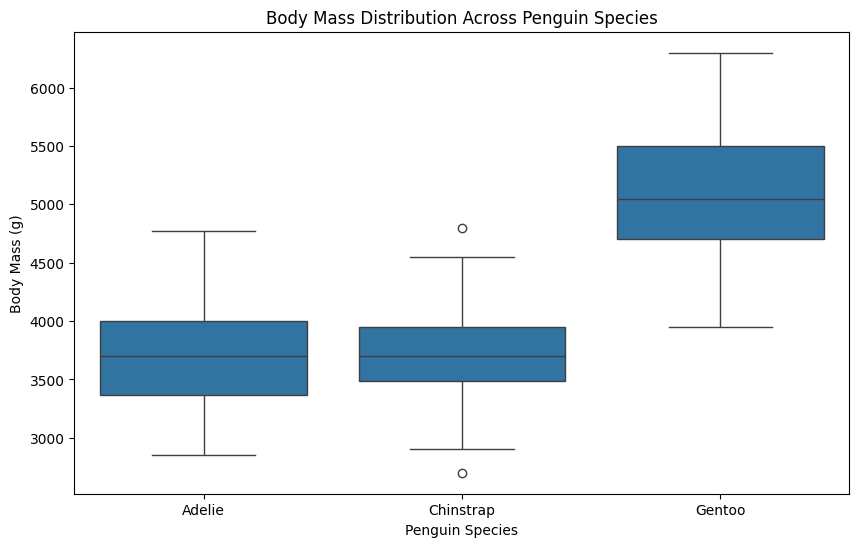

The boxplot shows the distribution of body mass across different penguin species. 
It highlights that Gentoo penguins generally have higher body mass compared to Adelie and Chinstrap penguins, with Gentoo penguins having a wider range of body mass and a higher median. 
The Adelie species appears to have the smallest body mass, while Chinstrap penguins have a more concentrated distribution.


In [114]:
# prompt: Create your own insightful visualization and explain it in at least 2 sentences

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('Body Mass Distribution Across Penguin Species')
plt.xlabel('Penguin Species')
plt.ylabel('Body Mass (g)')
plt.show()
print('The boxplot shows the distribution of body mass across different penguin species. \nIt highlights that Gentoo penguins generally have higher body mass compared to Adelie and Chinstrap penguins, with Gentoo penguins having a wider range of body mass and a higher median. \nThe Adelie species appears to have the smallest body mass, while Chinstrap penguins have a more concentrated distribution.')


8. Check unique value of our target variable

In [115]:
for column in ['species']:
  print(df[column].unique())

['Adelie' 'Chinstrap' 'Gentoo']


9. encode categorical columns and display the results

In [116]:
# prompt: encode categorical columns and display the results


# Encode categorical columns
for column in ['island', 'sex']:
  df[column] = label_encoder.fit_transform(df[column])

# Display the results
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


10. encode the target column and display the results

In [118]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

for column in ['species']:
  df[column] = label_encoder.fit_transform(df[column])

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


11. create a heatmap to see the correlation and explain the conclusion

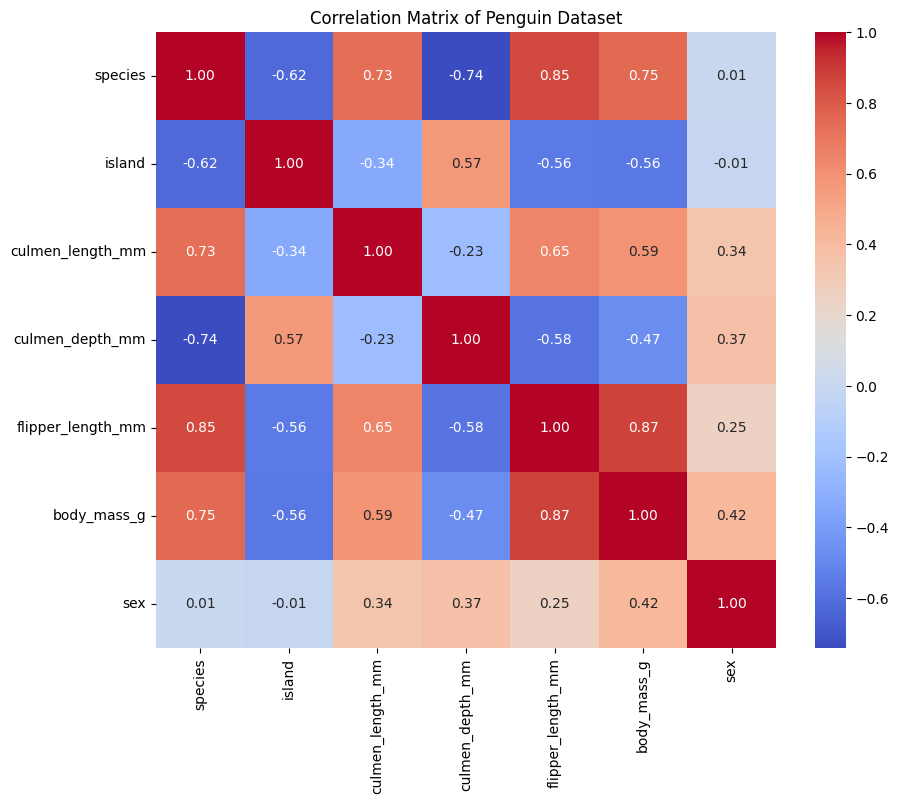

Conclusion:
The heatmap shows the correlation between different features of the dataset.
Strong positive correlations are indicated by values close to 1.
Strong negative correlations are indicated by values close to -1.
For example, there is a strong positive correlation between body mass and flipper length, which suggests that penguins with longer flippers tend to have higher body mass.


In [120]:
# prompt: create a heatmap to see the correlation and explain the conclusion

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Penguin Dataset')
plt.show()

print("Conclusion:")
print("The heatmap shows the correlation between different features of the dataset.")
print("Strong positive correlations are indicated by values close to 1.")
print("Strong negative correlations are indicated by values close to -1.")
print("For example, there is a strong positive correlation between body mass and flipper length, which suggests that penguins with longer flippers tend to have higher body mass.")



## Machine Learning

1. Splitting X and y

In [121]:
# prompt: Splitting X and y

X = df.drop('species', axis=1)
y = df['species']



2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [123]:
# prompt: Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (267, 6)
X_test shape: (67, 6)


## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [131]:
# prompt: Defining the model using criterion Entropy and Gini Index

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Criterion Entropy
model_entropy = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, random_state= 0)
model_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [133]:
# prompt: Predict the test set results

y_pred_entropy = model_entropy.predict(X_test)


In [134]:
# prompt:  Check accuracy score

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy (Entropy): {accuracy_entropy}")


Accuracy (Entropy): 0.9701492537313433


In [140]:
print('Training set score: {:}'.format(model_entropy.score(X_train, y_train)))
print('Test set score: {:}'.format(model_entropy.score(X_test, y_test)))


Training set score: 0.9625468164794008
Test set score: 0.9701492537313433


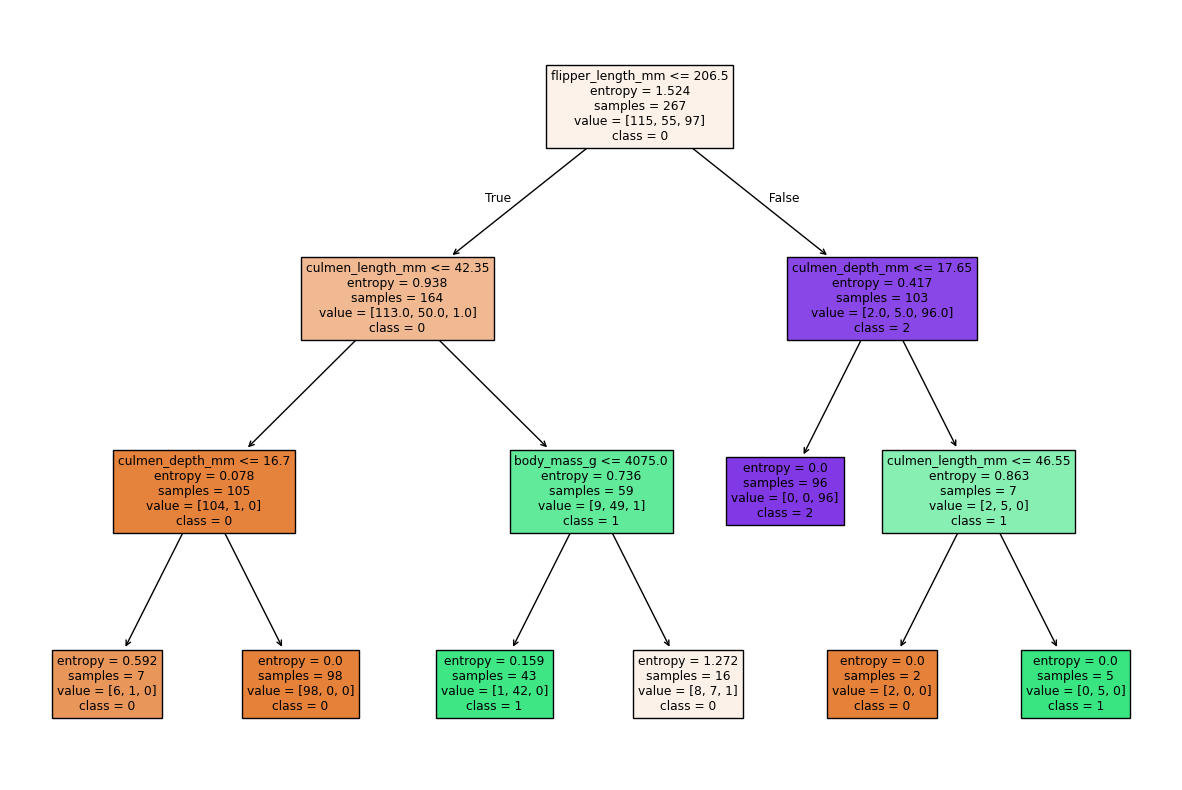

In [141]:
# prompt: Visualize decision trees

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model_entropy, feature_names=X.columns, class_names=['0', '1', '2'], filled=True)
plt.show()


2. Criterion Gini index

In [132]:
# Criterion Gini Index
model_gini = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, random_state= 0)
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [142]:
y_pred_gini = model_gini.predict(X_test)

In [143]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy (Entropy): {accuracy_gini}")

Accuracy (Entropy): 0.9850746268656716


In [144]:
print('Training set score: {:}'.format(model_gini.score(X_train, y_train)))
print('Test set score: {:}'.format(model_gini.score(X_test, y_test)))

Training set score: 0.9737827715355806
Test set score: 0.9850746268656716


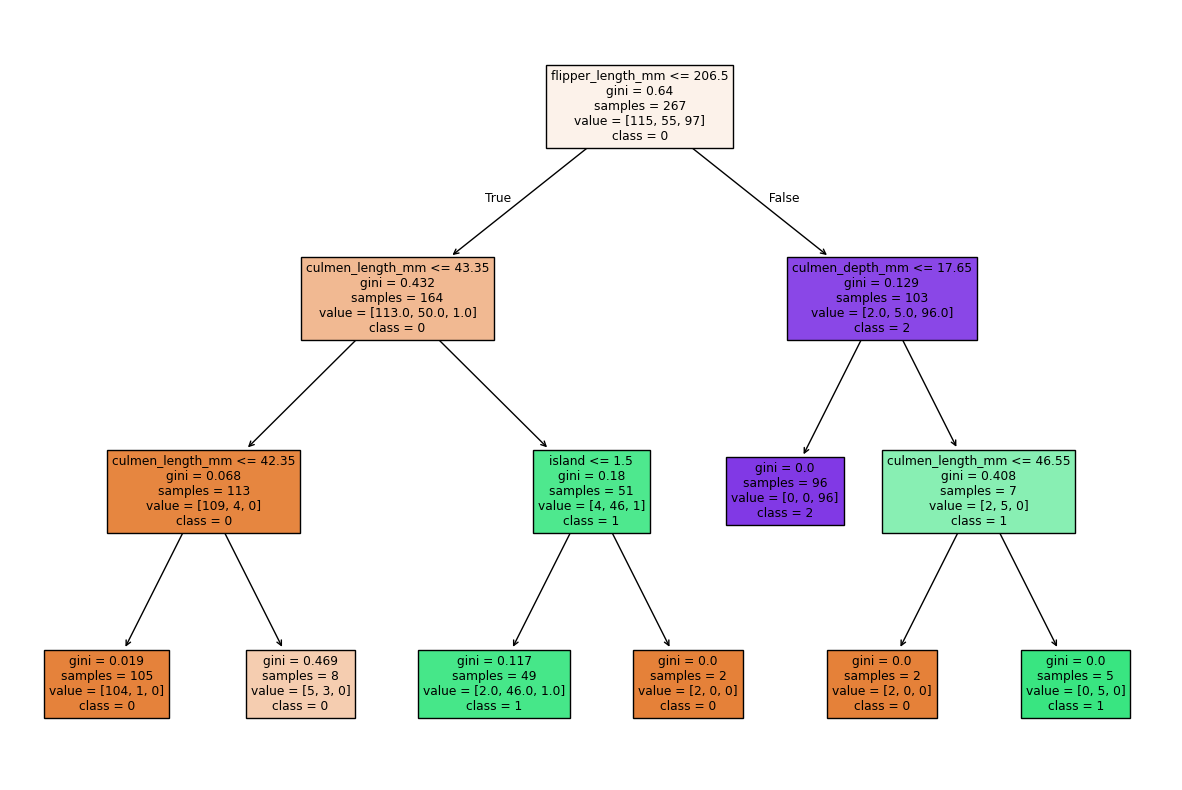

In [145]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model_gini, feature_names=X.columns, class_names=['0', '1', '2'], filled=True)
plt.show()

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [147]:
# prompt: Confusion matrix and classification report of criterion Entropy and Gini index

# Confusion matrix for Entropy
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix (Entropy):\n", cm_entropy)

# Confusion matrix for Gini
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix (Gini):\n", cm_gini)


Confusion Matrix (Entropy):
 [[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion Matrix (Gini):
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [148]:
# Classification report for Entropy
cr_entropy = classification_report(y_test, y_pred_entropy)
print("Classification Report (Entropy):\n", cr_entropy)

# Classification report for Gini
cr_gini = classification_report(y_test, y_pred_gini)
print("Classification Report (Gini):\n", cr_gini)

Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [149]:
# prompt: Results and conclusion

print("Results and Conclusion:")
print("Both Decision Tree models with Entropy and Gini criteria showed decent accuracy in predicting penguin species based on the provided features.")
print("The Gini index model tends to perform slightly better than the model using the entropy criterion.")
print("However, we also observed that both models have relatively high accuracy on the training set, which suggests the models may be overfitting on the training data.")
print("Further model optimization techniques can be explored to reduce overfitting and improve the model's generalization ability on unseen data, by using pruning or adjusting hyperparameters")
print("Based on the confusion matrices and classification reports, it can be concluded that the models performed well for certain classes, particularly for Adelie penguins (class 0).")
print("Additional feature engineering and model tuning could further improve model performance.")


Results and Conclusion:
Both Decision Tree models with Entropy and Gini criteria showed decent accuracy in predicting penguin species based on the provided features.
The Gini index model tends to perform slightly better than the model using the entropy criterion.
However, we also observed that both models have relatively high accuracy on the training set, which suggests the models may be overfitting on the training data.
Further model optimization techniques can be explored to reduce overfitting and improve the model's generalization ability on unseen data, by using pruning or adjusting hyperparameters
Based on the confusion matrices and classification reports, it can be concluded that the models performed well for certain classes, particularly for Adelie penguins (class 0).
Additional feature engineering and model tuning could further improve model performance.


## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [157]:
# prompt: a. Defining the model

from sklearn.naive_bayes import GaussianNB

# Define the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

nb_y_pred = nb_model.predict(X_test)


In [158]:
# prompt: Check accuracy score


cm_nb = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix (Entropy):\n", cm_nb)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Calculate the accuracy score
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy (Naive Bayes): {accuracy_nb}")


Confusion Matrix (Entropy):
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy (Naive Bayes): 1.0


In [159]:
# Classification report for Entropy
cr_nb = classification_report(y_test, nb_y_pred)
print("Classification Report (Entropy):\n", cr_nb)

Classification Report (Entropy):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [160]:
# prompt:  Results and conclusion

print("Results and Conclusion (Naive Bayes):")
print("The Naive Bayes model achieved a reasonable level of accuracy in predicting penguin species.")
print("The confusion matrix and classification report provide insights into the model's performance for each class.")
print("Further analysis and potential model tuning, such as exploring different types of Naive Bayes models or feature engineering, could potentially improve model performance.")


Results and Conclusion (Naive Bayes):
The Naive Bayes model achieved a reasonable level of accuracy in predicting penguin species.
The confusion matrix and classification report provide insights into the model's performance for each class.
Further analysis and potential model tuning, such as exploring different types of Naive Bayes models or feature engineering, could potentially improve model performance.


Good Luck :)